# Scikit Learn

## Packages

In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X, y = load_breast_cancer(return_X_y=True)

In [ ]:
X.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 42)

In [ ]:
print(f'X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}, y_test: {y_test.shape}')

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

In [ ]:
knn.score(X_test_scaled, y_test)

In [85]:
knn.predict_proba(X_test_scaled)

array([[0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.4, 0.6],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.2, 0.8],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.8, 0.2],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.2, 0.8],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.8,

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
data = fetch_openml('car', as_frame=True).frame

In [ ]:
data

In [ ]:
unique_values = [data[col].unique().tolist() for col in data.columns]
encoder = OrdinalEncoder(
    categories= unique_values,
)
data[data.columns.tolist()] = encoder.fit_transform(data[data.columns.tolist()])

In [ ]:
data

In [ ]:
encoder.inverse_transform(data[data.columns.tolist()])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
adult = fetch_openml('adult', as_frame=True).frame

In [76]:
adult

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,2,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,2,United-States,<=50K
48838,4,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,2,United-States,<=50K
48839,2,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,3,United-States,<=50K
48840,2,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,2,0,2,United-States,<=50K


In [ ]:
import pandas as pd

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

encoded_value = encoder.fit_transform(adult[['race','occupation']])
new_columns = encoder.get_feature_names_out(['race', 'occupation'])

In [ ]:
df_encoded = pd.DataFrame(encoded_value, columns=new_columns, index = adult.index)
df_encoded

In [79]:
adult_final = pd.concat(
    [adult.drop(columns = ['race', 'occupation']), df_encoded],
    axis = 1
)

In [80]:
adult_final

,age,workclass,fnlwgt,education,education-num,marital-status,relationship,sex,capitalgain,capitalloss,...,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,occupation_nan
0,2,State-gov,77516,Bachelors,13,Never-married,Not-in-family,Male,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Husband,Male,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,Private,215646,HS-grad,9,Divorced,Not-in-family,Male,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,Private,234721,11th,7,Married-civ-spouse,Husband,Male,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Wife,Female,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,2,Private,215419,Bachelors,13,Divorced,Not-in-family,Female,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
48838,4,NaN,321403,HS-grad,9,Widowed,Other-relative,Male,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
48839,2,Private,374983,Bachelors,13,Married-civ-spouse,Husband,Male,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
48840,2,Private,83891,Bachelors,13,Divorced,Own-child,Male,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [11]:
X, _ = make_blobs(n_samples=5000, centers = 7, random_state=42)

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

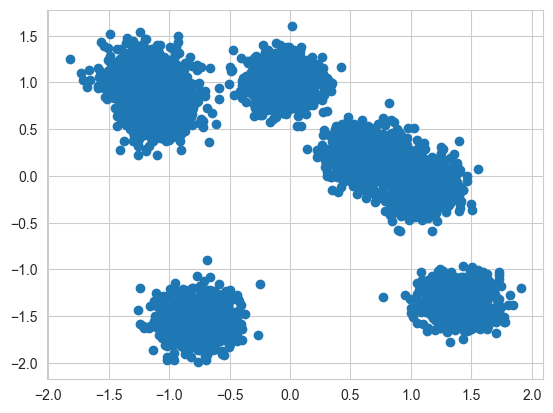

In [13]:
plt.scatter(X_scaled[:,0], X_scaled[:,1])

In [40]:
kmeans = KMeans(n_clusters = 2)

In [41]:
kmeans.fit(X_scaled)

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


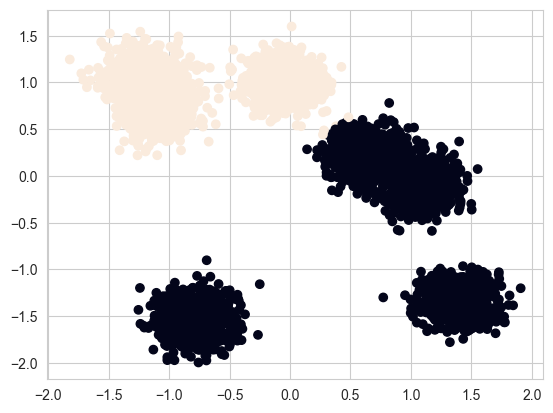

In [42]:
plt.scatter(X_scaled[:,0], X_scaled[:,1], c = kmeans.labels_)

In [43]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN


In [53]:
X,_ = make_moons(n_samples=5000, random_state=42, noise=0.08)
X_scaled2 = scaler.fit_transform(X)
kmeans.fit(X_scaled2)

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


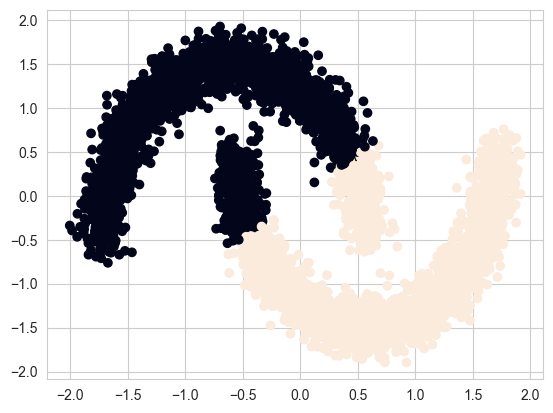

In [54]:
plt.scatter(X_scaled2[:,0], X_scaled2[:,1], c = kmeans.labels_)

In [70]:
X,_ = make_moons(n_samples=5000, random_state=42, noise=0.056)
X_scaled3 = scaler.fit_transform(X)
dbscan = DBSCAN(eps=0.2)
dbscan.fit(X_scaled3)

,eps,0.2
,min_samples,5
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


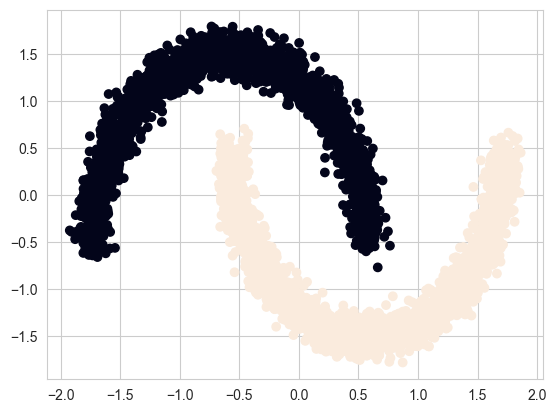

In [71]:
plt.scatter(X_scaled3[:,0], X_scaled3[:,1], c = dbscan.labels_)

In [79]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [82]:
X, y = fetch_openml('mnist_784', return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 42)

In [93]:
pca = PCA(n_components = 28)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

In [95]:
clf = LogisticRegression(max_iter=100)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9178571428571428

In [96]:
clf = LogisticRegression(max_iter=100)
clf.fit(X_train_reduced, y_train)
clf.score(X_test_reduced, y_test)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.89

In [97]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [98]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 42)

In [99]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
}

In [101]:
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier(n_jobs = -1)
grid = GridSearchCV(clf, param_grid, cv = 5)

In [102]:
grid.fit(X_train, y_train)

,estimator,RandomForestC...ier(n_jobs=-1)
,param_grid,"{'max_depth': [None, 5, ...], 'min_samples_split': [2, 5], 'n_estimators': [50, 100, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,150


In [103]:
grid.best_params_

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}

In [105]:
clf = grid.best_estimator_

In [106]:
clf.score(X_test, y_test)

0.9674285714285714

In [111]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")

X_train: (455, 30), y_train: (455,)


In [113]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components = 10)),
    ('forest', RandomForestClassifier())
])

pipe.fit(X_train, y_train)

,steps,"[('scaler', ...), ('pca', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_components,10
,copy,True
,whiten,False
,svd_solver,'auto'


In [114]:
pipe.score(X_test, y_test)

0.9473684210526315